<!-- Bài 1: Viết chương trình chọn quả kiwi từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục excercise.
Tịnh tiến quả kiwi sang phải 30 pixels. -->

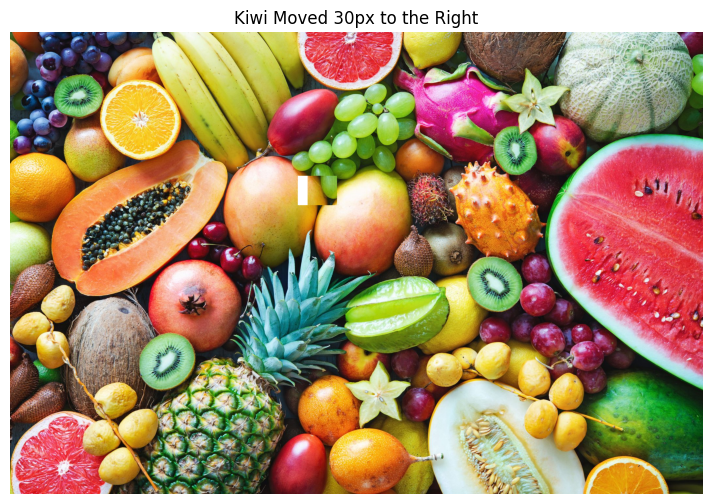

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = "exercise/colorful-ripe-tropical-fruits.jpg"
image = cv2.imread(image_path)


y1, y2 = 440, 530
x1, x2 = 880, 970
kiwi_roi = image[y1:y2, x1:x2]


image_copy = image.copy()
image_copy[y1:y2, x1:x2] = 255  # fill white


x_offset = 30
new_x1 = x1 + x_offset
new_x2 = x2 + x_offset


image_copy[y1:y2, new_x1:new_x2] = kiwi_roi


image_result_rgb = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(12, 6))
plt.imshow(image_result_rgb)
plt.axis("off")
plt.title("Kiwi Moved 30px to the Right")
plt.show()


<!-- Bài 2 : Viết chương trình chọn quả đu đủ và quả dưa hấu từ ảnh colorful-ripe-tropical-fruits.jpg trong thư mục
exercise. Đổi màu 2 đối tượng này. -->

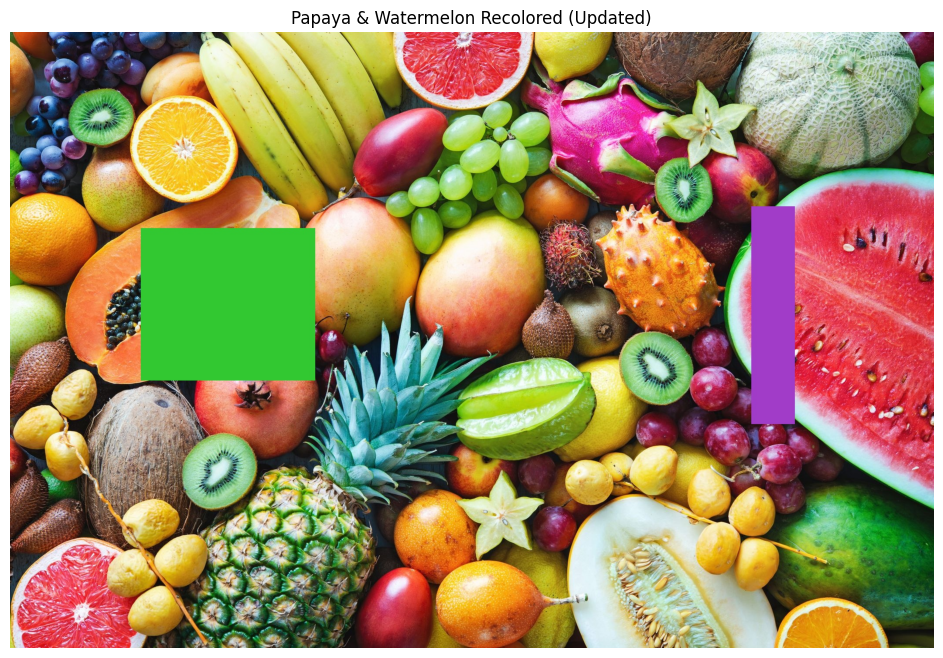

In [42]:
# Cập nhật lại đúng vị trí quả dưa hấu nằm sát bên phải ảnh (theo quan sát mới)

# Load lại ảnh gốc
image_path = "exercise/colorful-ripe-tropical-fruits.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edited_image = image_rgb.copy()

# Quả đu đủ (cam, dài bên trái)
papaya_top_left = (300, 450)
papaya_bottom_right = (700, 800)
edited_image[papaya_top_left[1]:papaya_bottom_right[1], papaya_top_left[0]:papaya_bottom_right[0], 0] = 50
edited_image[papaya_top_left[1]:papaya_bottom_right[1], papaya_top_left[0]:papaya_bottom_right[0], 1] = 200
edited_image[papaya_top_left[1]:papaya_bottom_right[1], papaya_top_left[0]:papaya_bottom_right[0], 2] = 50

# Quả dưa hấu lát đỏ (bên phải sát mép ảnh)
# Điều chỉnh lại: x khoảng [990, 1150], y khoảng [170, 670]
watermelon_top_left = (1700, 400)
watermelon_bottom_right = (1800, 900)
edited_image[watermelon_top_left[1]:watermelon_bottom_right[1], watermelon_top_left[0]:watermelon_bottom_right[0], 0] = 160
edited_image[watermelon_top_left[1]:watermelon_bottom_right[1], watermelon_top_left[0]:watermelon_bottom_right[0], 1] = 60
edited_image[watermelon_top_left[1]:watermelon_bottom_right[1], watermelon_top_left[0]:watermelon_bottom_right[0], 2] = 200

# Lưu lại ảnh mới sau khi đổi màu
output_path = "exercise/papaya_watermelon_corrected.jpg"
cv2.imwrite(output_path, cv2.cvtColor(edited_image, cv2.COLOR_RGB2BGR))  # Lưu ảnh

# Load ảnh mới lưu (nếu cần)
final_image = cv2.imread(output_path)
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

# Hiển thị ảnh mới
plt.figure(figsize=(12, 8))
plt.imshow(final_image_rgb)
plt.title("Papaya & Watermelon Recolored (Updated)")
plt.axis("off")
plt.show()


<!-- Bài 3: VIết chương trình chọn ngọn núi và con thuyền từ ảnh quang_ninh.jpg trong thư mục exercise
Xoay 2 đối tượng này 1 góc 45 độ và lưu vào máy. -->

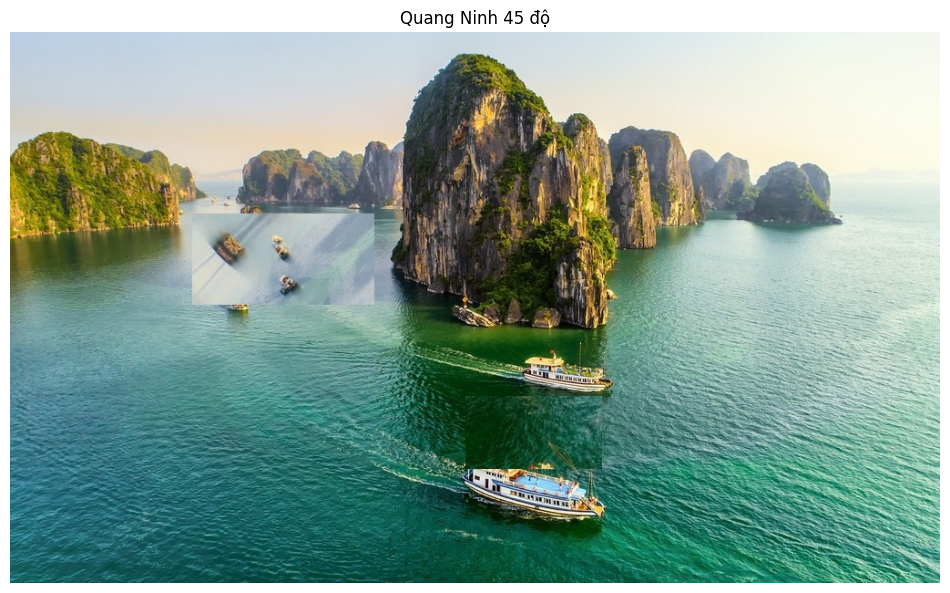

✅ Đã lưu ảnh kết quả tại: exercise/quang_ninh_rotated.jpg


In [46]:
import cv2
import numpy as np
from PIL import Image

# Đọc ảnh gốc
image_path = "exercise/quang_ninh.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edited_image = image_rgb.copy()

# --- Chọn vùng ngọn núi (tọa độ ví dụ, bạn cần chỉnh theo ảnh thực) ---
mountain_top_left = (200, 200)
mountain_bottom_right = (400, 300)
mountain_roi = edited_image[mountain_top_left[1]:mountain_bottom_right[1],
                            mountain_top_left[0]:mountain_bottom_right[0]]

# --- Xoay vùng ngọn núi ---
(h, w) = mountain_roi.shape[:2]
center = (w // 2, h // 2)
M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated_mountain = cv2.warpAffine(mountain_roi, M, (w, h), borderMode=cv2.BORDER_REFLECT)

# Chèn lại ảnh ngọn núi đã xoay
edited_image[mountain_top_left[1]:mountain_top_left[1]+h,
             mountain_top_left[0]:mountain_top_left[0]+w] = rotated_mountain

# --- Chọn vùng con thuyền ---
boat_top_left = (500, 400)
boat_bottom_right = (650, 480)
boat_roi = edited_image[boat_top_left[1]:boat_bottom_right[1],
                        boat_top_left[0]:boat_bottom_right[0]]

# Xoay vùng con thuyền
(hb, wb) = boat_roi.shape[:2]
center_boat = (wb // 2, hb // 2)
M_boat = cv2.getRotationMatrix2D(center_boat, 45, 1.0)
rotated_boat = cv2.warpAffine(boat_roi, M_boat, (wb, hb), borderMode=cv2.BORDER_REFLECT)

# Chèn lại ảnh thuyền đã xoay
edited_image[boat_top_left[1]:boat_top_left[1]+hb,
             boat_top_left[0]:boat_top_left[0]+wb] = rotated_boat

# Lưu ảnh kết quả
output_path = "exercise/quang_ninh_rotated.jpg"
cv2.imwrite(output_path, cv2.cvtColor(edited_image, cv2.COLOR_RGB2BGR))

final_image = cv2.imread(output_path)
final_image_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 8))
plt.imshow(final_image_rgb)
plt.title("Quang Ninh 45 độ")
plt.axis("off")
plt.show()

print(f"✅ Đã lưu ảnh kết quả tại: {output_path}")


<!-- 4. Viết chương trình chọn ngôi chùa từ ảnh pagoga.jpg trong thư mục exercise. Tăng kích thước ngồi chùa lên 5 lần rồi lưu vào máy. -->

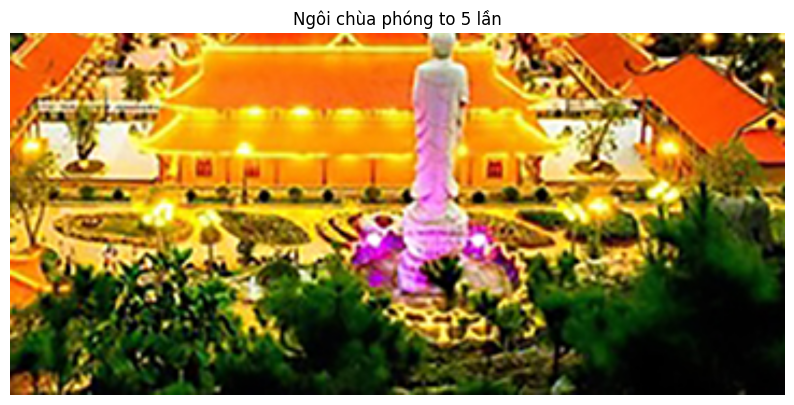

In [2]:
# Sau khi reset kernel, cần load lại thư viện và xử lý lại
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


# Load lại ảnh sau reset
image_path = "exercise/pagoda.jpg"
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edited_image = image_rgb.copy()

# Chọn vùng ngôi chùa (trung tâm ảnh)
pagoda_top_left = (120, 180)
pagoda_bottom_right = (480, 380)

# Cắt vùng ngôi chùa
pagoda_roi = edited_image[pagoda_top_left[1]:pagoda_bottom_right[1], pagoda_top_left[0]:pagoda_bottom_right[0]]

# Phóng to 5 lần
pagoda_enlarged = cv2.resize(pagoda_roi, None, fx=5, fy=5, interpolation=cv2.INTER_LINEAR)

# Lưu ảnh kết quả
output_path = "exercise/pagoda_enlarged.jpg"
Image.fromarray(pagoda_enlarged).save(output_path)

output_path

plt.figure(figsize=(10, 6))
plt.imshow(pagoda_enlarged)
plt.title("Ngôi chùa phóng to 5 lần")
plt.axis("off")
plt.show()


<!-- 5. Viết chương trình tạo menu:
Tịnh tiến
Xoay
Phóng to
Thu nhỏ
Coordinate map
Khi chọn phím T,X,P,H,C thì hỏi muốn thực hiện trên hình nào từ 3 hình thư mục exercise. Người dùng chọn hình nào thì thực hiện phép biến đổi trên hình nào. -->

MENU
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Coordinate map (vẽ lưới)

Chọn ảnh để xử lý:
1. exercise/pagoda.jpg
2. exercise/quang_ninh.jpg
3. exercise/colorful-ripe-tropical-fruits.jpg


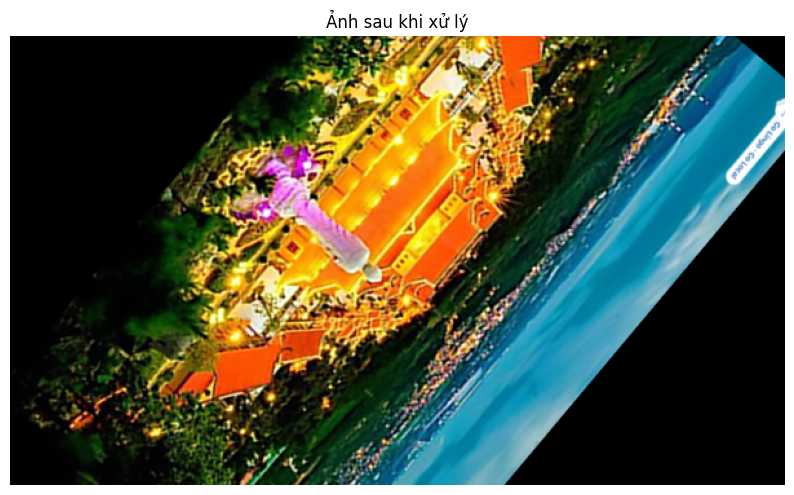

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Danh sách ảnh trong thư mục exercise
image_list = {
    "1": "exercise/pagoda.jpg",
    "2": "exercise/quang_ninh.jpg",
    "3": "exercise/colorful-ripe-tropical-fruits.jpg"
}

# Hiển thị menu chọn hình
def select_image():
    print("\nChọn ảnh để xử lý:")
    for k, v in image_list.items():
        print(f"{k}. {v}")
    key = input("Nhập số ảnh (1-3): ").strip()
    return image_list.get(key)

# Hiển thị menu
print("MENU")
print("T - Tịnh tiến")
print("X - Xoay")
print("P - Phóng to")
print("H - Thu nhỏ")
print("C - Coordinate map (vẽ lưới)")
choice = input("Nhập lựa chọn (T/X/P/H/C): ").strip().upper()

# Chọn ảnh
img_path = select_image()
if not img_path:
    print("Ảnh không hợp lệ.")
    exit()

# Đọc ảnh
image = cv2.imread(img_path)
if image is None:
    print("Không thể đọc ảnh.")
    exit()

# Xử lý lựa chọn
if choice == "T":
    dx = int(input("Nhập số pixel tịnh tiến theo trục X: "))
    dy = int(input("Nhập số pixel tịnh tiến theo trục Y: "))
    rows, cols = image.shape[:2]
    M = np.float32([[1, 0, dx], [0, 1, dy]])
    result = cv2.warpAffine(image, M, (cols, rows))

elif choice == "X":
    angle = float(input("Nhập góc xoay (độ): "))
    rows, cols = image.shape[:2]
    M = cv2.getRotationMatrix2D((cols // 2, rows // 2), angle, 1)
    result = cv2.warpAffine(image, M, (cols, rows))

elif choice == "P":
    fx = float(input("Nhập hệ số phóng to (ví dụ 2.0): "))
    result = cv2.resize(image, None, fx=fx, fy=fx, interpolation=cv2.INTER_LINEAR)

elif choice == "H":
    fx = float(input("Nhập hệ số thu nhỏ (ví dụ 0.5): "))
    result = cv2.resize(image, None, fx=fx, fy=fx, interpolation=cv2.INTER_AREA)

elif choice == "C":
    step = int(input("Nhập khoảng cách lưới (px): "))
    result = image.copy()
    for x in range(0, result.shape[1], step):
        cv2.line(result, (x, 0), (x, result.shape[0]), (0, 0, 255), 1)
    for y in range(0, result.shape[0], step):
        cv2.line(result, (0, y), (result.shape[1], y), (0, 0, 255), 1)
else:
    print("Lựa chọn không hợp lệ.")
    exit()

# Hiển thị ảnh kết quả
result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10, 6))
plt.imshow(result_rgb)
plt.title("Ảnh sau khi xử lý")
plt.axis("off")
plt.show()
